# Microsoft Movie Analysis

_Author: Valentina Valdez_

![picture of motion picture camera](Images/pexels-donald-tong-66134.jpg)

## Business Understanding

### Company Vision and High Level Goals

Microsoft's decision to venture into the movie industry marks an exciting strategic shift. By telling compelling stories through film, Microsoft can connect with audiences on an emotional level and establish a stronger presence in popular culture, leading to increased brand awareness. 

Other tech companies such as Apple and Amazon have successfully transitioned into the filmmaking industry. Microsoft, by leveraging its extensive technological expertise, vast resources, and global reach, can produce high-quality movies that will enhance its brand image and increase its cultural influence. Within this analysis, I will explore how Microsoft should approach this new venture with the goal of **maximizing profitability** and **creating positive brand exposure**. 

The filmmaking industry is more than one hundred years old. However, this research will its analysis to films released between 2010 and 2019. This timeframe will ensure that the insights from this analysis reflect the current state of the filmmaking industry.

### Research Goals

Given the above goals, this research aims to answer the following questions:
- What is the right budget to maximize profits?
- Which directors can deliver high profits? 
- Which directors can deliver acclaimed films?
- Are there directors that do both?

Let's dive in!

## Data Understanding

This analysis uses a variety of trusted data sources. The datasets will be used to narrow down how Microsoft should  invest in its filmmaking efforts. The sources are as follows:

- **IMDB:** Launched in 1990 - and owned by Amazon since 1998 - IMDB is one of the most popular and recognizable databases. This database houses a large amount of information such as directors, writers, genres, and release date.  
- **The Numbers:** This database was started in 1997, and is now the largest freely available database of movie business information. The available data contains information about movie titles, production budgets, and gross revenue data. 
- **The Academy Awards**: This data was created by scraping the <a href="https://awardsdatabase.oscars.org/">academy database</a> for a Kaggle competition. The Academy Awards is considered the most prestigious filmaking award in America, and this data will provide valuable insights in identifying individuals capable of making prestige films. This dataset contains information on Academy Award nominees and winners between the years 1927 and 2023. Access the data <a href="https://www.kaggle.com/datasets/unanimad/the-oscar-award">here</a> .  


This analysis is limited by the information in these datasets, and may not fully encompass the full scope of the filmmaking industry. However, the data is current enough that this analysis can still provide valuable insight and guide Microsoft on their next steps.


The first step in this analysis is to understand the data and how we can transform it to gleam insights. First, I am importing the necessary libraries to read the data and perform the necessary analysis. I will review the data sources one by one to determine what needs to be done before we can perform analysis. 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime
%matplotlib inline

# Change pandas formatting to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

### IMDB

Let's examine IMDB's database first, which is the most extensive of the three. From this database, I will need information on movies titles, release years, and the directors per film. 

In [2]:
#Connect to database
conn = sqlite3.connect("Data/im.db")

#Review tables
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
#Query 'movie_basics' tables
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [4]:
#Review structure of 'movie_basics' table
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
#Query 'movie_akas' table
movie_akas = pd.read_sql("""
SELECT * 
FROM movie_akas
;""", conn)

#Review structure of 'movie_akas' table
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


Based on the samples above, I should be able to make a table that has the movie title, directors, and release years. I will also be able to filter out any foreign films by using the 'movie_akas' table. 

### The Numbers

For this dataset, the goal is to calculate the Return on Investment per film. Additionally, films will be categorized by production budget so that the budget can be described as low, mid, or high. Eventually, I can tie this information to the IMDB table and identify which films and directors have produced high ROIs. 

In [6]:
#Import data
numbers_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')

#Preview table
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
#Review data structure
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Based on the preliminary review, this dataset should be sufficient to calculate net profit and ROI per film. 

### The Academy Awards

While there are many other awards for filmmaking, the Academy Awards is the most prestigious US based filmmkaing award. This dataset will be critical in providing information on which films and directors have been critically acclaimed. 

In [8]:
#Import data
oscars_df = pd.read_csv('Data/the_oscar_award.csv')

#Preview table
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [9]:
#Review data structure 
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


The simplest way to use this data will be to use the film name and aggregate the number of awards. We can combine this data with the tables above to determine which films and directors have been recognized - as in nominated - by the Academy.

## Data Preparation

Now that we have a good understanding of our data, the next step is to clean the datasets and engineer some features.

### IMDB

#### Feature Engineering

For the IMDB dataset, I will need the film name, release year, director. The following filters and features are also addressed in the query below:
- Filter films made before 2010 or after 2019 to stay consistent with other datasets.
- Remove any foreign language films by using a sub-query that ensures films in this list are from the US region and that the language is English. 
- Create a column based on the director's 'death_year', which will be tastefully called 'current'. This information will let us know if the director is currently alive, which will help me narrow down the list of available directors for future Microsoft projects. 
- Create a column called 'm_id', which will help me identify movies more accurately based on their title and release date. Some movies share the same name, but it is rare that movies of the same name are released in the same year. This feature will be useful when combining datasets. 

Since the feature engineering will be done as part of the query, the data cleaning will come after. For the other datasets, this process will be inverted. 

In [10]:
#Query relevant tables and preview data
movies_data = pd.read_sql(
"""
SELECT primary_title AS movie, 
       start_year AS release_year, 
       genres,
       primary_name AS director,
       primary_title || start_year AS m_id,
       CASE
           WHEN death_year IS NULL THEN 1
           ELSE 0
        END AS current
  FROM movie_basics
      JOIN directors 
           USING(movie_id)
      JOIN persons
           USING(person_id)
  WHERE start_year BETWEEN 2010 AND 2019
    AND movie_id IN (SELECT movie_id
                     FROM movie_akas
                     WHERE region IS 'US'
                     AND (language = 'en' OR language IS NULL)
);""", conn)

#Preview results
movies_data.head()

,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
1,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1


In [11]:
#Review DataFrame structure
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107173 entries, 0 to 107172
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie         107173 non-null  object
 1   release_year  107173 non-null  int64 
 2   genres        106423 non-null  object
 3   director      107173 non-null  object
 4   m_id          107173 non-null  object
 5   current       107173 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


#### Data Cleaning

In [12]:
#Check for duplicates
duplicates = movies_data[movies_data.duplicated()]
print(len(duplicates))
duplicates.head()

52917


,movie,release_year,genres,director,m_id,current
1,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
6,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
7,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
9,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1
10,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1


In [13]:
#Remove duplicates
movies_data.drop_duplicates(inplace=True)

#Check number of records
print(f'Number of records: {len(movies_data)}')

#Review results
movies_data.head()

Number of records: 54256


,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1
5,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0


In [14]:
#Check for extraneous values
for col in movies_data.columns:
    print(col, '\n', movies_data[col].value_counts(normalize=True).head(), '\n')

movie 
 World of Death               0.00
Venice 70: Future Reloaded   0.00
Our RoboCop Remake           0.00
Our Footloose Remake         0.00
Grindsploitation             0.00
Name: movie, dtype: float64 

release_year 
 2016   0.13
2014   0.12
2013   0.12
2015   0.12
2017   0.11
Name: release_year, dtype: float64 

genres 
 Documentary    0.17
Drama          0.11
Comedy         0.06
Horror         0.05
Comedy,Drama   0.03
Name: genres, dtype: float64 

director 
 Larry Rosen       0.00
Charlie Minn      0.00
Dustin Ferguson   0.00
Philip Gardiner   0.00
James Franco      0.00
Name: director, dtype: float64 

m_id 
 World of Death2016               0.00
Venice 70: Future Reloaded2013   0.00
Our RoboCop Remake2014           0.00
Our Footloose Remake2011         0.00
Grindsploitation2016             0.00
Name: m_id, dtype: float64 

current 
 1   1.00
0   0.00
Name: current, dtype: float64 



Last but not least, I will remove the id column since it is not being used.

In [15]:
#Print results from data cleaning
print(f" This table has {len(movies_data)} entries. \
Each entry represents a film, its release date, and director.")

 This table has 54256 entries. Each entry represents a film, its release date, and director.


### The Numbers

Next step is to clean and create features for the numbers dataset. From here, we want to find net profits and ROI. In addition to that, each film will be categorized by the size of their budget. 

#### Data Cleaning

In [16]:
#Check for duplicates
duplicates = numbers_df[numbers_df.duplicated()]
print(len(duplicates))

0


No duplicates, so no need to drop rows. 

In [17]:
#Check for extraneous values
for col in numbers_df.columns:
    print(col, '\n', numbers_df[col].value_counts(normalize=True).head(), '\n\n')

id 
 4    0.01
53   0.01
61   0.01
65   0.01
69   0.01
Name: id, dtype: float64 


release_date 
 Dec 31, 2014   0.00
Dec 31, 2015   0.00
Dec 31, 2010   0.00
Dec 31, 2008   0.00
Dec 31, 2009   0.00
Name: release_date, dtype: float64 


movie 
 Home        0.00
King Kong   0.00
Halloween   0.00
Footloose   0.00
RoboCop     0.00
Name: movie, dtype: float64 


production_budget 
 $20,000,000   0.04
$10,000,000   0.04
$30,000,000   0.03
$15,000,000   0.03
$25,000,000   0.03
Name: production_budget, dtype: float64 


domestic_gross 
 $0            0.09
$8,000,000    0.00
$7,000,000    0.00
$2,000,000    0.00
$10,000,000   0.00
Name: domestic_gross, dtype: float64 


worldwide_gross 
 $0            0.06
$8,000,000    0.00
$7,000,000    0.00
$2,000,000    0.00
$15,000,000   0.00
Name: worldwide_gross, dtype: float64 




Unfortunately, this dataset contains some movies that do not have reported worldwide gross numbers. These will be dropped since we are interested only in films that have global reach. However, all of the numbers are stored as strings. will convert the columns to their appropriate data type. 

In [18]:
#Converting release_date column to datetime object
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])

#Filter results to movies released after 1969 - start of the New Hollywood Era 
numbers_df = numbers_df.loc[numbers_df['release_date'] >= '2010']


#Review results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"


In [19]:
#Convert 'production_budget', 'domestic_gross', 'worldwide_gross' to integers

#Remove extra symbols from strings
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols:
    numbers_df[col] = numbers_df[col].str.replace('$','').str.replace(',','')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220


In [20]:
#Convert columns to integers
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
numbers_df[cols] = numbers_df[cols].apply(pd.to_numeric, axis=1)

#Review results
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   int64         
 4   domestic_gross     2194 non-null   int64         
 5   worldwide_gross    2194 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 120.0+ KB


In [21]:
#Drop rows where worldwide_gross is 0. 
numbers_df = numbers_df.loc[numbers_df['worldwide_gross'] > 0]

#Drop id row since Pandas created a new index for this table
numbers_df.drop(['id'], axis = 1, inplace=True)

#Print results from data cleaning
print(f" This table has {len(numbers_df)} entries. \
Each entry represents a film and its respective financial data.")

 This table has 1922 entries. Each entry represents a film and its respective financial data.


#### Feature Engineering

Now that the data is clean, we can create the 'ROI' (Return on Investment) column with the following formula:

$$
ROI = \frac{Net Profit}{Production Budget} * 100
$$

In [22]:
#Add Net Profit Column
numbers_df['net_profit'] = (numbers_df['worldwide_gross'] - numbers_df['production_budget']).round(-3)

#Add ROI Column
numbers_df['ROI'] = (numbers_df['net_profit'] / numbers_df['production_budget'] * 100).round(-1)

#Check results
numbers_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00


Next, I will categorize the production budget into three different types:
- **Low Budget:** Less than **\\$5 million**
- **Mid Budget:** Between **\\$5 million and $50 million**
- **High Budget:** Greater than **\\$50 million**

In [23]:
#Budget categorization - first, define function

def budget_ranking(budget):
    if budget < 500000:
        return "low"
    elif budget > 50000000:
        return "high"
    else:
        return "mid"

In [24]:
#Create new column and apply function
numbers_df['budget_level'] = numbers_df['production_budget'].apply(budget_ranking)
numbers_df.head() #Check results

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,budget_level
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,high
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,high
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,high
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,high
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00,high


Now that the budgets, profits, and ROI columns are sorted, I will fix the date columns. 

In [25]:
#Add new column "Year" as integer
numbers_df['release_year'] = pd.DatetimeIndex(numbers_df['release_date']).year

#Check results
numbers_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,budget_level,release_year
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,high,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,high,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,high,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,high,2017
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00,high,2015


Lastly, I will create the 'm_id' column so that we can merge this dataset. 

In [26]:
#Create new column for identifying movies based on title and year
numbers_df['m_id'] = numbers_df['movie'] + numbers_df['release_year'].astype(str)

#Check results
numbers_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,budget_level,release_year,m_id
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,high,2011,Pirates of the Caribbean: On Stranger Tides2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,high,2019,Dark Phoenix2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,high,2015,Avengers: Age of Ultron2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,high,2017,Star Wars Ep. VIII: The Last Jedi2017
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00,high,2015,Star Wars Ep. VII: The Force Awakens2015


In [27]:
#Print results from data cleaning
print(f" This table has {len(numbers_df)} entries. \
Each entry represents a film and its financial data.")

 This table has 1922 entries. Each entry represents a film and its financial data.


### The Academy Awards

#### Data Cleaning

As with the datasets above, I will be checking for duplicates and addressing null or invalid results. First, I am filtering the table to the established timeframe. 

In [28]:
#Filtering for films made between 1969 and 2019
oscars_df = oscars_df.loc[(oscars_df['year_film'] >= 2010) & (oscars_df['year_film'] <= 2019)].reset_index()
print("Min year: ", oscars_df['year_film'].min())
print("Max year: ", oscars_df['year_film'].max())


Min year:  2010
Max year:  2019


In [29]:
#Check for duplicates
duplicates = oscars_df[oscars_df.duplicated()]
print(len(duplicates))

0


In [30]:
#Check for extraneous values
for col in oscars_df.columns:
    print(col, '\n', oscars_df[col].value_counts(normalize=True).head(), '\n\n')

index 
 10239   0.00
9406    0.00
9399    0.00
9400    0.00
9401    0.00
Name: index, dtype: float64 


year_film 
 2019   0.10
2017   0.10
2016   0.10
2013   0.10
2012   0.10
Name: year_film, dtype: float64 


year_ceremony 
 2020   0.10
2018   0.10
2017   0.10
2014   0.10
2013   0.10
Name: year_ceremony, dtype: float64 


ceremony 
 92   0.10
90   0.10
89   0.10
86   0.10
85   0.10
Name: ceremony, dtype: float64 


category 
 BEST PICTURE                    0.07
WRITING (Original Screenplay)   0.04
SOUND MIXING                    0.04
SHORT FILM (Animated)           0.04
SHORT FILM (Live Action)        0.04
Name: category, dtype: float64 


name 
 Alexandre Desplat   0.01
John Williams       0.01
Sandy Powell        0.00
Roger Deakins       0.00
Jacqueline Durran   0.00
Name: name, dtype: float64 


film 
 La La Land           0.01
The Shape of Water   0.01
The King's Speech    0.01
Lincoln              0.01
The Revenant         0.01
Name: film, dtype: float64 


winner 
 False   0.7

In [31]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1253 non-null   int64 
 1   year_film      1253 non-null   int64 
 2   year_ceremony  1253 non-null   int64 
 3   ceremony       1253 non-null   int64 
 4   category       1253 non-null   object
 5   name           1253 non-null   object
 6   film           1214 non-null   object
 7   winner         1253 non-null   bool  
dtypes: bool(1), int64(4), object(3)
memory usage: 69.9+ KB


This dataset seems very complete except for a few null values in the 'film' column. This is due to some awards that about achievements and are not tied to a film. These values will be dropped since they are not relevant to this analysis. 

In [32]:
#Drop null values
oscars_df.dropna(inplace=True)

#Recheck null values
oscars_df.info()

#Print results from data cleaning
print(f" This table has {len(oscars_df)} entries. \
Each entry represents an award category that can be attributed to a film.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1248
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1214 non-null   int64 
 1   year_film      1214 non-null   int64 
 2   year_ceremony  1214 non-null   int64 
 3   ceremony       1214 non-null   int64 
 4   category       1214 non-null   object
 5   name           1214 non-null   object
 6   film           1214 non-null   object
 7   winner         1214 non-null   bool  
dtypes: bool(1), int64(4), object(3)
memory usage: 77.1+ KB
 This table has 1214 entries. Each entry represents an award category that can be attributed to a film.


#### Feature Engineering

For this dataset, I will build the following features:
- **Group by film:** Since the data is structured by Award, I will group by film so that each row represents one film and the number of nominations that film received. 
- **Film Year:** I want to keep this date, so I am getting the 'mean', which will retain the appropriate value. 
- **m_id:** As with the other datasets, I am creating a film id column to prevent incorrectly merging films with the same name. 

I am also going to filter the awards and remove any awards for short films, international or foreign language.

In [33]:
# First, review categories
oscars_df['category'].unique()

array(['ACTOR IN A LEADING ROLE', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A LEADING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'ANIMATED FEATURE FILM', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'COSTUME DESIGN', 'DIRECTING', 'DOCUMENTARY (Feature)',
       'DOCUMENTARY (Short Subject)', 'FILM EDITING',
       'FOREIGN LANGUAGE FILM', 'MAKEUP', 'MUSIC (Original Score)',
       'MUSIC (Original Song)', 'BEST PICTURE', 'SHORT FILM (Animated)',
       'SHORT FILM (Live Action)', 'SOUND EDITING', 'SOUND MIXING',
       'VISUAL EFFECTS', 'WRITING (Adapted Screenplay)',
       'WRITING (Original Screenplay)', 'MAKEUP AND HAIRSTYLING',
       'PRODUCTION DESIGN', 'INTERNATIONAL FEATURE FILM'], dtype=object)

In [34]:
#Filter unwanted award categories
oscars_df = oscars_df[~oscars_df['category'].str.contains(\
                        'foreign|international|short', case=False)]

#Review results
oscars_df['category'].unique()

array(['ACTOR IN A LEADING ROLE', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A LEADING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'ANIMATED FEATURE FILM', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'COSTUME DESIGN', 'DIRECTING', 'DOCUMENTARY (Feature)',
       'FILM EDITING', 'MAKEUP', 'MUSIC (Original Score)',
       'MUSIC (Original Song)', 'BEST PICTURE', 'SOUND EDITING',
       'SOUND MIXING', 'VISUAL EFFECTS', 'WRITING (Adapted Screenplay)',
       'WRITING (Original Screenplay)', 'MAKEUP AND HAIRSTYLING',
       'PRODUCTION DESIGN'], dtype=object)

In [35]:
#Create new DataFrame showing how many nominartions each film received
oscars_by_film = oscars_df.groupby('film').agg( {'category': 'count','year_film': 'mean',})\
                         .reset_index()\
                        .rename(columns= {'category':'nominations'})
#Change 'year_film' type to integer
oscars_by_film['year_film'] = oscars_by_film['year_film'].astype(int)

#Create 'm_id' to merge with other tables
oscars_by_film['m_id'] = oscars_by_film['film'] + oscars_by_film['year_film'].astype(str)

#Review results
oscars_by_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   film         382 non-null    object
 1   nominations  382 non-null    int64 
 2   year_film    382 non-null    int64 
 3   m_id         382 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.1+ KB


## Exploratory Data Analysis

Now that the data is clean and has the necessary features, it is time to answer our original business questions.

### What is the right budget to maximize profit?

First, lets visually examine the correlation between ROI and net profit.

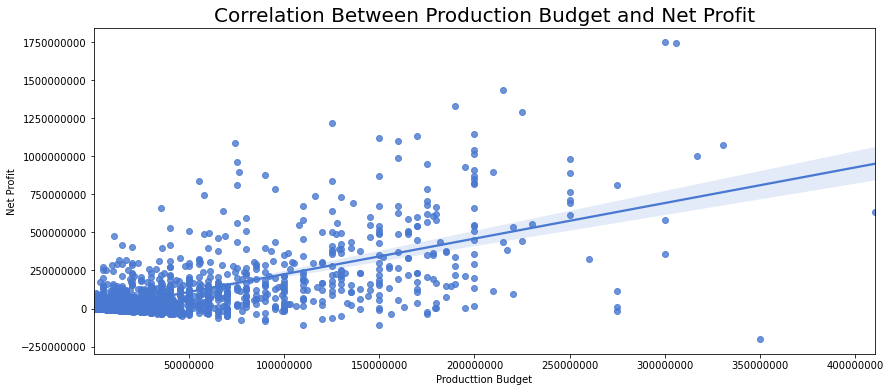

In [36]:
# Set the width, height, and style
plt.figure(figsize=(14,6))
sns.set_palette('muted')

#Create plot
ax1 = sns.regplot(x=numbers_df['production_budget'],y=numbers_df['net_profit'])

#Create labels
ax1.ticklabel_format(style='plain')
plt.title('Correlation Between Production Budget and Net Profit', fontsize=20)
ax1.set_xlabel("Producttion Budget")
ax1.set_ylabel("Net Profit");

From the graph above, we can observe a modest positive correlation between budget and net profit. 

Breaking it down by budget level might bring insights into which budgets have high potential for commercial success - and profits.

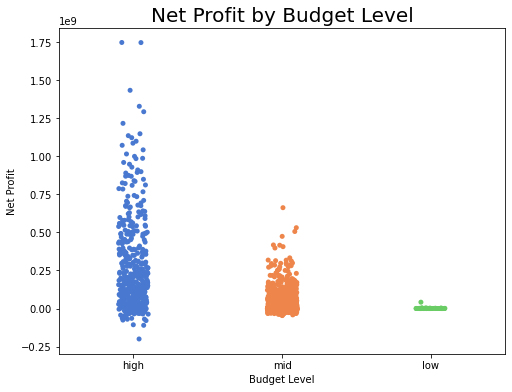

In [37]:
# Set the width and height
plt.figure(figsize=(8,6))

#Create plot
ax1 = sns.stripplot(x=numbers_df['budget_level'],y=numbers_df['net_profit'])

#Create labels
ax1.set_xlabel("Budget Level")
ax1.set_ylabel("Net Profit")
plt.title('Net Profit by Budget Level', fontsize=20);

''

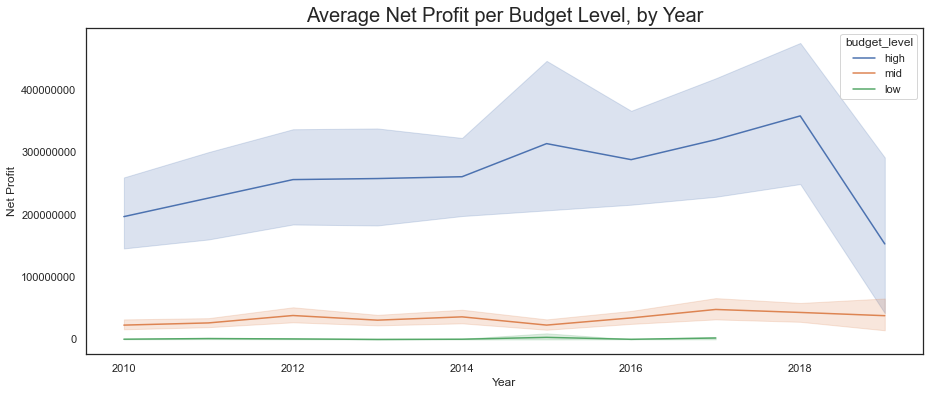

In [38]:
#Set figure size and style
sns.set(style="white")
plt.figure(figsize=(15, 6))

#Create plot
ax1 = sns.lineplot(data=numbers_df, x='release_year',y='net_profit', hue='budget_level', estimator='mean')

#Create labels
ax1.set_xlabel("Year")
ax1.set_ylabel("Net Profit")
ax1.ticklabel_format(style='plain')
plt.title('Average Net Profit per Budget Level, by Year', fontsize=20)

;

The visualization *Average Net Profit per Budget Level, by Year* shows a significant dip in 2019. This is more than likely a result of the COVID-19 pandemic. 

While low budget movies can certainly be profitable, **mid (\\$5 to \\$50 million)** and **high (greater than \\$50 million)** budgets have a better chance of earning much higher profits. In addition to high, movies with higher profits tend to be much more culturally relevant.

### Which directors can deliver high profits? 

Directors are the creative leads of the film. It is critical to select directors that know how to turn ideas into profitable products (aka films). Lets find current directors with the highest good success records in delivering profitable films. 

In [39]:
#Make list of current directors by dropping those with directors that are no longer current
current_directors = movies_data[movies_data['current'] == 1]

#Merge financial data using 'm_id' and make a new dataframe
directors_budget = current_directors.merge(numbers_df, how='inner', \
                                           left_on=['m_id','movie','release_year'],\
                                          right_on=['m_id','movie','release_year'])

#Sort
directors_budget.sort_values('net_profit', ascending=False).head()

,movie,release_year,genres,director,m_id,current,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,budget_level
1179,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Anthony Russo,Avengers: Infinity War2018,1,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,high
1180,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Joe Russo,Avengers: Infinity War2018,1,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,high
3,Jurassic World,2015,"Action,Adventure,Sci-Fi",Colin Trevorrow,Jurassic World2015,1,2015-06-12,215000000,652270625,1648854864,1433855000,670.00,high
1000,Furious 7,2015,"Action,Crime,Thriller",James Wan,Furious 72015,1,2015-04-03,190000000,353007020,1518722794,1328723000,700.00,high
82,The Avengers,2012,"Action,Adventure,Sci-Fi",Joss Whedon,The Avengers2012,1,2012-05-04,225000000,623279547,1517935897,1292936000,570.00,high


This data is sorted by film, but the question is focused on the directors. Let's rearrange this data to better suit that purpose.

To narrow down results, I will check the top 30 directors based on financial results. 

In [40]:
#Rearrange data by directors
all_directors = directors_budget.groupby('director').agg(\
                                               {'production_budget': 'mean', \
                                                'net_profit': 'mean', \
                                                'ROI': 'mean',\
                                                'movie': 'count'})\
                                          .sort_values('net_profit', ascending=False).reset_index()
#Find top 30 directors
top_bdirectors = all_directors.head(30)

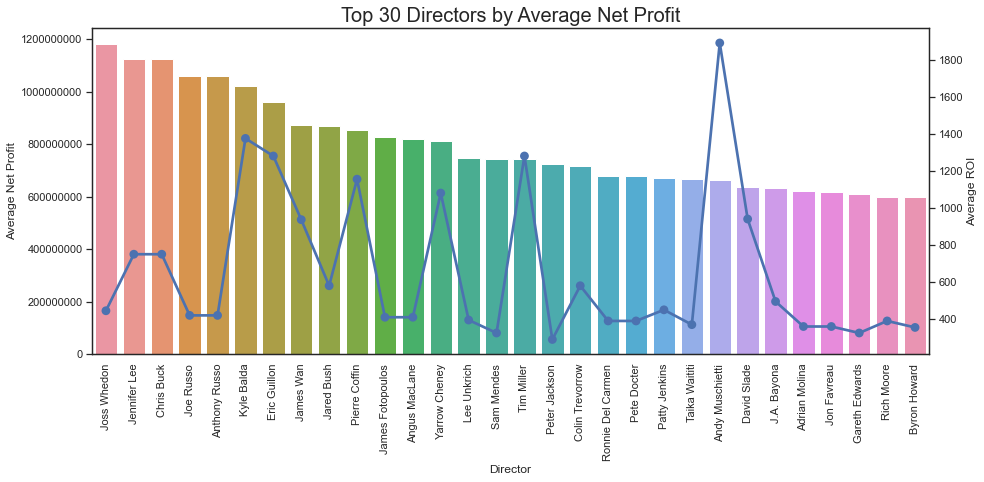

In [41]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_bdirectors['director'], y=top_bdirectors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_bdirectors['director'], y=top_bdirectors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax1.ticklabel_format(style='plain', axis="y")
ax2.set_ylabel("Average ROI")
plt.title("Top 30 Directors by Average Net Profit", fontsize=20);


Great! We have a list of 30 directors that have a history of delivery profitable films. 

### Which directors can deliver acclaimed films?

The idea here is very similar to the analysis above, but the analysis is now focused on which directors have worked on the most Oscar nominated films. I will use the merged dataset from earlier with the financial information. This merged dataset will be used once for the last question. 

In [42]:
#Merge tables
oscars_budgets = directors_budget.merge(oscars_by_film, how='left', on='m_id')

#Drop unnecessary rows
oscars_budgets.drop(['film', 'year_film', 'current', 'domestic_gross'], axis = 1, inplace=True)

#Fill null values in 'nominations' with 0
oscars_budgets['nominations'] = oscars_budgets['nominations'].fillna(0)

#Add new categorical column based on whether or not a film was nominated for any Academy Awards
oscars_budgets['nominated'] = oscars_budgets['nominations'] > 0

#Create new table with only Oscar nominated films
oscars_final = oscars_budgets.loc[oscars_budgets['nominated'] == True]

oscars_final.head()

,movie,release_year,genres,director,m_id,release_date,production_budget,worldwide_gross,net_profit,ROI,budget_level,nominations,nominated
7,Tangled,2010,"Adventure,Animation,Comedy",Byron Howard,Tangled2010,2010-11-24,260000000,586477240,326477000,130.00,high,1.00,True
8,Tangled,2010,"Adventure,Animation,Comedy",Nathan Greno,Tangled2010,2010-11-24,260000000,586477240,326477000,130.00,high,1.00,True
13,Real Steel,2011,"Action,Drama,Family",Shawn Levy,Real Steel2011,2011-10-07,110000000,263880341,153880000,140.00,high,1.00,True
14,Toy Story 3,2010,"Adventure,Animation,Comedy",Lee Unkrich,Toy Story 32010,2010-06-18,200000000,1068879522,868880000,430.00,high,5.00,True
16,Lincoln,2012,"Biography,Drama,History",Steven Spielberg,Lincoln2012,2012-11-09,65000000,273346281,208346000,320.00,high,12.00,True


As before, the dataset is by film. I will rearrange the data by director and select the top 30 directors based on the number of acclaimed films they have worked on.

In [44]:
directors_awards = oscars_final.groupby('director').agg(\
                                                    {'net_profit': 'mean', \
                                                     'ROI': 'mean',\
                                                     'movie': 'count',\
                                                     'nominated': 'count'})\
                                                      .sort_values('nominated', ascending=False).reset_index()
top_ndirectors = directors_awards.head(30)

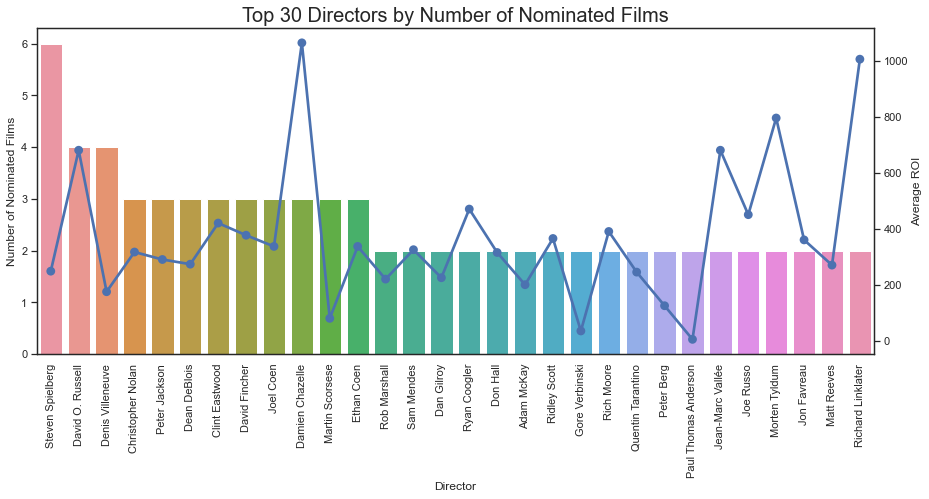

In [45]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_ndirectors['director'], y=top_ndirectors['nominated'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_ndirectors['director'], y=top_ndirectors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Number of Nominated Films")
ax2.set_ylabel("Average ROI")
plt.title("Top 30 Directors by Number of Nominated Films", fontsize=20);

I kept the ROI data to see if critically acclaimed also meant that no one saw the film. Thankfully, that seems not to be the case. And now we have a list of directors that can deliver award winning films!

### Are there directors that do both?

Looking at our top 30 directors for awards and profit, there is no overlap. To answer this question, I will expand the top directors to 100 from each dataset to see if there is any overlap. 

In [46]:
#Merge top director datasets
top_directors = directors_awards.head(100).merge(all_directors.head(100), how='inner')
top_directors

,director,net_profit,ROI,movie,nominated,production_budget
0,Peter Jackson,724316333.33,290.00,3,3,250000000.00
1,Dean DeBlois,396571666.67,273.33,3,3,146333333.33
2,Sam Mendes,745074000.00,325.00,2,2,250000000.00
3,Rich Moore,600471000.00,390.00,2,2,157500000.00
4,Jon Favreau,619505500.00,360.00,2,2,172500000.00
5,Lee Unkrich,745944000.00,395.00,2,2,187500000.00
6,Byron Howard,597953500.00,355.00,2,2,205000000.00
7,Chris Sanders,383969500.00,260.00,2,2,150000000.00
8,Chris Williams,487322500.00,315.00,2,2,157500000.00
9,Pete Docter,679236000.00,390.00,1,1,175000000.00


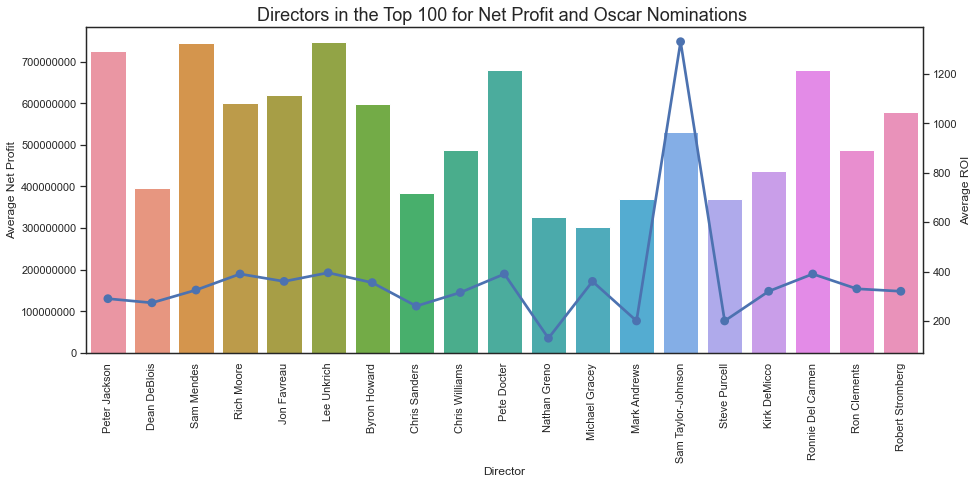

In [47]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_directors['director'], y=top_directors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_directors['director'], y=top_directors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax1.ticklabel_format(style='plain', axis="y")
ax2.set_ylabel("Average ROI")
plt.title("Directors in the Top 100 for Net Profit and Oscar Nominations ", fontsize=18);

Out of 100 top directors for each category, there are **19 directors** that can do both!

## Recommendations

After this preliminary review, we recommend that Microsoft invests in the following strategies:

- **Invest in mostly high budget films**, with a mix of mid budget films. High budget films are more likely to be commercially successful and also have a much larger cultural presence and resonance. 
- **Select directors with experience delivering high net gross or high critical acclaim experience**. To keep Microsoft's brand reputation, we need the best shot at success (either financially or culturally). 
- **If possible, hire directors that can do both**. There is no overlap in the top 30 directors of each category. Directors either excel at critical acclaim or financial success. However, it is possible to select directorial talent that can deliver excellent films that can do both. 

## Next Steps

The movie industry is large and complex, and this research only scratches the surface of the data Microsoft can use to make more informed decisions. My recommendations for next steps are as follows:
- **Investigate other filmmaking talent aside from directors.** There are writers, actors, producers, and composers that can help make or break a film. 
- **Research movie genres.** The types of films made also vary by trends. What are the emerging genres? Which ones are the most profitable? Which ones are more likely to be nominated for an Oscar? 
- **Look into the role of intellectual property as a success factor**. Big IPs like Marvel, DC, Nintendo, Legos, and Disney tend to hog the marker. It is possible that there are popular IPs that have yet to be adapted into film. 